<a href="https://colab.research.google.com/github/movadelsol/helloworld/blob/master/SVM_Margin_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn import datasets
from sklearn import svm
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import sys

!pip install playground-data
# @sa https://pypi.org/project/playground-data/0.7.1/
import plygdata as pg
theDataset=pg.DatasetType.ClassifyCircleData
datalist=pg.generate_data(theDataset)
"""
 |  ClassifyCircleData = 'circle' 
 |  ClassifySpiralData = 'spiral'
 |  ClassifyTwoGaussData = 'gauss'
 |  ClassifyXORData = 'xor'
 |  RegressGaussian = 'reg-gauss'
 |  RegressPlane = 'reg-plane'
 """

  Created wheel for playground-data: filename=playground_data-1.1.0-py2.py3-none-any.whl size=20827 sha256=b973a2bddd6fc4772c58b3bc4324ad2a0883a8e6cfda8bdfc172f53c50434dd2
  Stored in directory: /root/.cache/pip/wheels/82/07/a9/68dc3f1c2cca3ce57b735854edda3620fb089f3ac64b9acfd4
Successfully built playground-data


"\n |  ClassifyCircleData = 'circle' \n |  ClassifySpiralData = 'spiral'\n |  ClassifyTwoGaussData = 'gauss'\n |  ClassifyXORData = 'xor'\n |  RegressGaussian = 'reg-gauss'\n |  RegressPlane = 'reg-plane'\n "

In [0]:
#help(pg.DatasetType)

In [0]:
!pip install mlxtend

In [20]:
X_train,y_train,X_val,y_val=pg.split_data(datalist,training_size=0.9)
#X_train.shape
#print("y_train:{}".format(np.unique(y_train)))
y_train=y_train.ravel()
#y_train=column_or_1d(y_train,warn=True)
print("y_train shape:{}".format(y_train.shape))

y_train shape:(450,)


In [21]:
svc = svm.SVC(C=1000, kernel="rbf", gamma=0.01, probability=True)
#svc = svm.SVC(C=1000, kernel="poly",degree=2)
#svc = svm.SVC(C=1000, kernel="linear")
svc.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

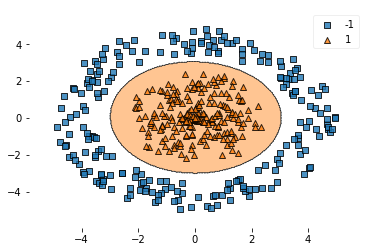

In [23]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train,y=y_train.astype(np.integer),clf=svc)

Z(max,min):(3.165186687579965,-9.90713428062622)


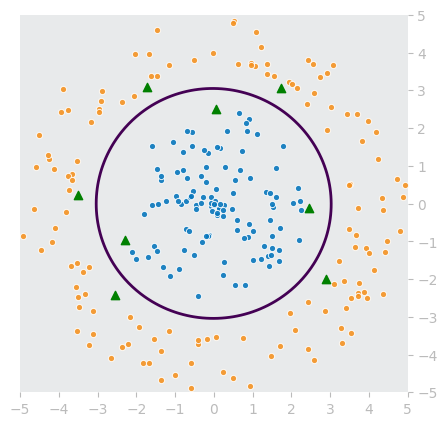

In [0]:

#
fig, ax = pg.datahelper.plot_sample(theDataset)
# Decision Boundary(決定境界)をプロットする
wide=5.0
px = np.arange(-wide,wide, 0.1)
py = np.arange(-wide,wide, 0.1)
PX, PY = np.meshgrid(px, py) # PX,PYはそれぞれ 100x100 行列
XX = np.c_[PX.ravel(), PY.ravel()] # XXは 10000x2行列
Z = svc.decision_function(XX)
#Z = svc.predict_proba(XX)[:,1] # SVMモデルで予測。y=1の確率は結果の2列目に入っているので取り出す。Zは10000次元ベクトル
Z = Z.reshape(PX.shape) # Zを100x100行列に変換
print("Z(max,min):({},{})".format(Z.max(),Z.min()))
plt.contour(PX, PY, Z, levels=[0.0], linewidths=2.0) # Z=0.5の等高線が決定境界となる
#plt.contour(PX, PY, Z, levels=[0.8], linewidths=2.0) # Z=0.5の等高線が決定境界となる

for x1 in svc.support_vectors_:
  plt.scatter(x1[0],x1[1],c='g',marker='^',edgecolors='face')


plt.xlim(-wide,wide)
plt.ylim(-wide,wide)
plt.show()

In [0]:
#help(plt.scatter)

In [0]:
#svc.fit(X_train, y_train)
print("Nb.support:",svc.n_support_)
print("Nb target:",X_train.shape)
svec=svc.decision_function(svc.support_vectors_)

print("support vectors Min:{},Max:{}".format(svec.min(),svec.max()))
print(svec)
print("Intercept:{}".format(svc.intercept_))
print("Size of")
print("Dual coefficient:{}".format(svc.dual_coef_.shape))
print(svc.dual_coef_)

alpha = svc.dual_coef_ / svec

print("ALPHA:sum:{}".format(np.sum(alpha)))
print("sqrt(alpha):{}".format(np.sqrt(np.sum(alpha))))

print("support vector :{}".format(svc.support_vectors_.shape))
omega = svc.dual_coef_ @ svc.support_vectors_
print("omega:{}".format(omega))
print("Norm omega:{}".format(np.linalg.norm(omega,2)))
#fig, ax = pg.datahelper.plot_sample(theDataset)
#for x1 in svc.support_vectors_:
#  print("V({}),Y:{}".format(x1,svc.decision_function([x1])))
#  plt.scatter(x1[0],x1[1],c='r')
#plt.show()
sum_coef=svc.dual_coef_.sum()
print("coef sum:{},shape:{},norm:{}".format(sum_coef,svc.dual_coef_.shape,np.linalg.norm(svec,2)))

Nb.support: [5 3]
Nb target: (450, 2)
support vectors Min:-1.0005363743301778,Max:1.000459511117274
[-1.00053637 -1.00008751 -0.99957689 -0.99962017 -1.00044521  1.00045951
  1.00033103  0.99946279]
Intercept:[-16.03242361]
Size of
Dual coefficient:(1, 8)
[[-35.05075971 -81.63760792 -56.95045444 -91.85380903 -74.58594029
   31.85729541 181.39422773 126.82704825]]
ALPHA:sum:680.150535615596
sqrt(alpha):26.079695849752465
support vector :(8, 2)
omega:[[19.69003679 -8.31269443]]
Norm omega:21.372843457024352
coef sum:2.2737367544323206e-13,shape:(1, 8),norm:2.8286110393988886


(array([ 9.,  8.,  9.,  8.,  5.,  8.,  8.,  7.,  4.,  8.,  4.,  7.,  6.,
        10., 10.,  9.,  8.,  7.,  5.,  7., 10., 11.,  4.,  6.,  9.,  9.,
        10.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  8.,  4.,  6.,  8.,  5.,
         5., 14., 10.,  8., 19., 13., 11., 15., 16., 15., 11., 58.]),
 array([-4.33900929, -4.22320217, -4.10739505, -3.99158794, -3.87578082,
        -3.7599737 , -3.64416659, -3.52835947, -3.41255235, -3.29674524,
        -3.18093812, -3.065131  , -2.94932389, -2.83351677, -2.71770965,
        -2.60190254, -2.48609542, -2.3702883 , -2.25448118, -2.13867407,
        -2.02286695, -1.90705983, -1.79125272, -1.6754456 , -1.55963848,
        -1.44383137, -1.32802425, -1.21221713, -1.09641002, -0.9806029 ,
        -0.86479578, -0.74898867, -0.63318155, -0.51737443, -0.40156732,
        -0.2857602 , -0.16995308, -0.05414597,  0.06166115,  0.17746827,
         0.29327538,  0.4090825 ,  0.52488962,  0.6406

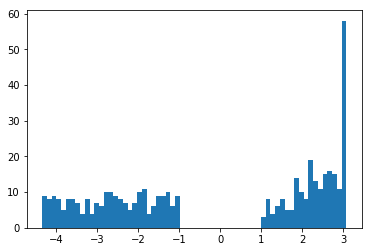

In [41]:
x_hist = svc.decision_function(X_train)
plt.hist(x_hist,bins=64)

In [0]:
negative_x = x_hist[x_hist<0]
positive_x = x_hist[x_hist>=0]

In [0]:
myu=negative_x.mean()
std=negative_x.std()

In [0]:
pmyu=positive_x.mean()
pstd=positive_x.std()

In [0]:
from scipy.stats import norm
import numpy as np

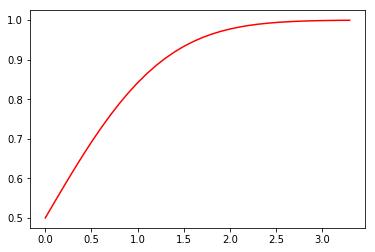

In [15]:
import math
import matplotlib.pyplot as plt

X = np.arange(0,3.4,0.1)
Y = norm.cdf(X,0,1)

plt.plot(X,Y,color='r')
plt.show()

In [40]:
1-norm.sf(0,pmyu,pstd)

2.2326909308478804e-05

In [35]:
norm.sf(0,myu,std)

0.003993065271581632

In [33]:
myu,std

(-2.634199992366147, 0.9930425854297708)

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location, and scale
 |      parameters from data.
 |      
 |      MLE stands for Maximum Likelihood Estimate.  Starting estimates for
 |      the